# A numerical 1D Schrödinger solution
Revised from initial work in comp phys class.
Based on: "TANG_DONGJIAO thesis.pdf"
Would be good to reconcile these two and publish to http://www.compadre.org/picup/

TODO: check agreement with theory

In [10]:
import numpy as np
from scipy.linalg import eigh, inv
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
N = 1000
x, dx = np.linspace(-1,1,N,retstep=True)
#dx = dx*0.1

In [208]:
# Finite square well
V_0 = np.zeros(N)
V_0[:] = 450
V_0[int(N/2 - N/6):int(N/2+N/6)] = 0

(-1.1, 1.1)

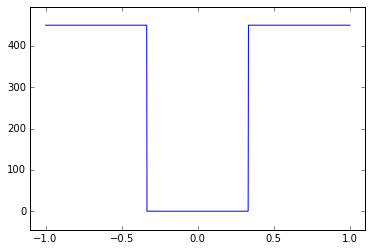

In [209]:
plt.plot(x,V_0)
plt.ylim(V.min() - 0.1*V_0.max(),V_0.max()*1.1)
plt.xlim(-1.1,1.1)

In [210]:
Alower = np.diag(np.ones(N)[:-1],k=-1)
Aupper = np.diag(np.ones(N)[:-1],k=1)
Amid = np.diag(-2*np.ones(N),k=0)

A = 1/dx**2 * (Alower + Amid + Aupper)

Blower = np.diag(np.ones(N)[:-1],k=-1)
Bupper = np.diag(np.ones(N)[:-1],k=1)
Bmid = np.diag(10*np.ones(N),k=0)

B = 1/12 * (Blower + Bmid + Bupper)

V = np.diag(V_0)
hbar=1
m=0.5

H = -(hbar**2)/(2*m)*inv(B)*A + V

In [211]:
energy, evecs = eigh(H,eigvals=(0,20))

In [212]:
E0 = energy[0]  # ground state energy

In [213]:
states = [evecs[:,i] for i in range(20)]

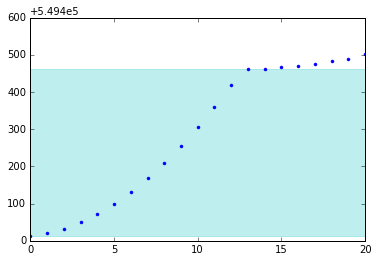

In [214]:
plt.plot(energy,".")
plt.fill_between(range(21),E0,E0+V_0.max(), color='c', alpha=0.25)  # Shade the bound states

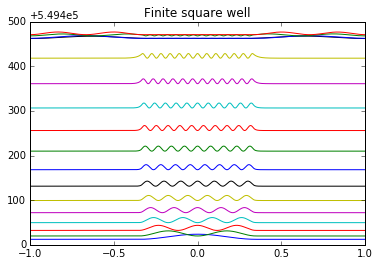

In [216]:
for i,state in enumerate(states[0:17]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2*2000 + energy[i])

plt.title("Finite square well")
#plt.fill_between(x,0,V,color='k',alpha=0.1)  # shade in the potential well

## SHO

In [220]:
# Finite square well
V_0 = 250*x**2

(-1.1, 1.1)

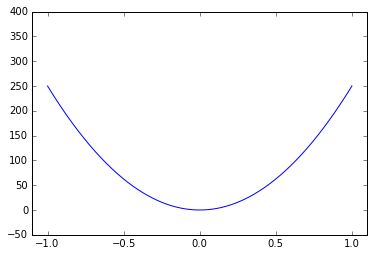

In [221]:
plt.plot(x,V_0)
plt.ylim(-50,400)
plt.xlim(-1.1,1.1)

In [222]:
Alower = np.diag(np.ones(N)[:-1],k=-1)
Aupper = np.diag(np.ones(N)[:-1],k=1)
Amid = np.diag(-2*np.ones(N),k=0)

A = 1/dx**2 * (Alower + Amid + Aupper)

Blower = np.diag(np.ones(N)[:-1],k=-1)
Bupper = np.diag(np.ones(N)[:-1],k=1)
Bmid = np.diag(10*np.ones(N),k=0)

B = 1/12 * (Blower + Bmid + Bupper)

V = np.diag(V_0)
hbar=1
m=0.5

H = -(hbar**2)/(2*m)*inv(B)*A + V

In [226]:
energy, evecs = eigh(H,eigvals=(0,30))
E0 = energy[0]

In [227]:
states = [evecs[:,i] for i in range(30)]

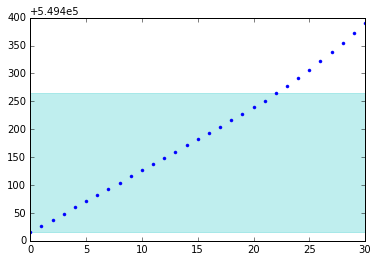

In [228]:
plt.plot(energy,".")
plt.fill_between(range(31),E0,E0+V_0.max(), color='c', alpha=0.25)

The bound states (below the cutoff) are clearly linear in energy (as expected), then above that we see the ∞-well solutions.

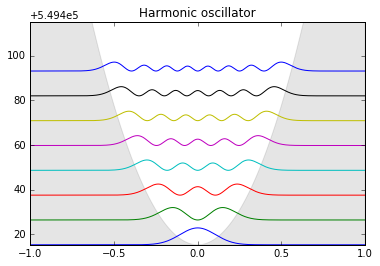

In [235]:
for i,state in enumerate(states[0:8]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2*1000 + energy[i])

plt.title("Harmonic oscillator")
plt.ylim(E0,E0+100)
plt.fill_between(x,E0,E0+V_0,color='k',alpha=0.1)

## Periodic wells:

In [336]:
N = 1000
x, dx = np.linspace(-1,1,N,retstep=True)
V_0 = np.zeros(N)
# periodic wells
V_0[:] = 1000
L = N/12  # width
S = N/10  # s
a = N/4   # 
for i in range(5):
    V_0[int(i*S+a):int(i*S+a+L)] = 0

(-1.1, 1.1)

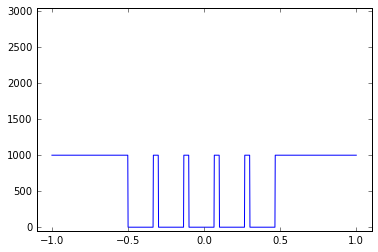

In [337]:
plt.plot(x,V_0)
plt.ylim(-50,3050)
plt.xlim(-1.1,1.1)

In [338]:
Alower = np.diag(np.ones(N)[:-1],k=-1)
Aupper = np.diag(np.ones(N)[:-1],k=1)
Amid = np.diag(-2*np.ones(N),k=0)

A = 1/dx**2 * (Alower + Amid + Aupper)

Blower = np.diag(np.ones(N)[:-1],k=-1)
Bupper = np.diag(np.ones(N)[:-1],k=1)
Bmid = np.diag(10*np.ones(N),k=0)

B = 1/12 * (Blower + Bmid + Bupper)

V = np.diag(V_0)
hbar=1
m=0.5

H = -(hbar**2)/(2*m)*inv(B)*A + V

In [339]:
energy, evecs = eigh(H,eigvals=(0,30))
E0 = energy[0]

In [340]:
states = [evecs[:,i] for i in range(30)]

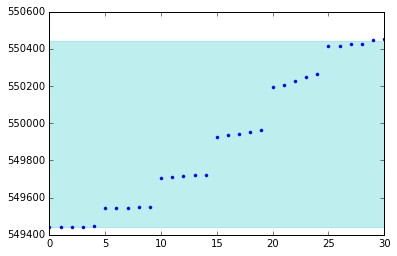

In [341]:
plt.plot(energy,".")
plt.fill_between(range(31),E0,E0+V_0.max(), color='c', alpha=0.25)

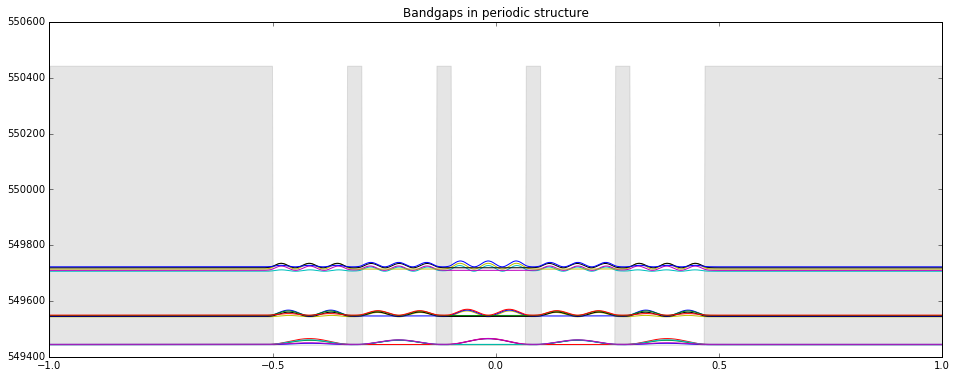

In [342]:
plt.figure(figsize=(16,6))
for i,state in enumerate(states[0:15]):
    # Make these plot at the height for a cool figure!
    plt.plot(x,state**2*3000 + energy[i])
    
plt.fill_between(x,E0,E0+V_0,color='k',alpha=0.1)
#plt.plot(E0+V_0) TODO
plt.title("Bandgaps in periodic structure")


## Bandgaps!

For Students: explore the symmetry of these states.
    
Q: Are there five degenerate states because each state has the particle in only one well?
    
Q: Why does each cluster of states start to have a slope in the E vs. # graph?

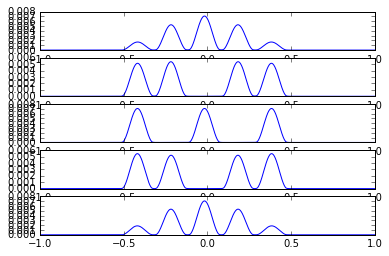

In [343]:
for i,state in enumerate(states[0:5]):
    plt.subplot(5,1,i+1)
    plt.plot(x, state**2)

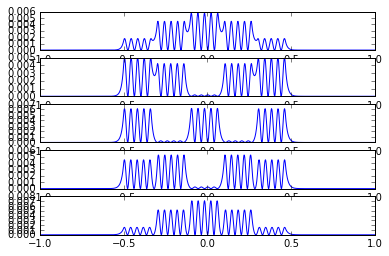

In [344]:
for i,state in enumerate(states[20:25]):
    plt.subplot(5,1,i+1)
    plt.plot(x, state**2)

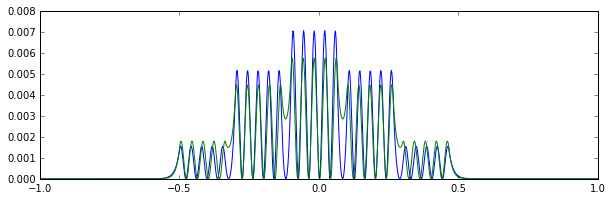

In [348]:
plt.figure(figsize=(10,3))
plt.plot(x,states[24]**2)
plt.plot(x,states[20]**2)